In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir("Desktop")

In [6]:
from statsmodels.tsa.api import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df1=pd.read_csv("dataset_tk.csv")

In [8]:
df1.isna().sum()

Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [9]:
df1.rename({"Unnamed: 0":"Date"},axis=1,inplace=True)

In [10]:
df1

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [11]:
df1.shape

(503, 34)

In [12]:
mean_temprature = df1.mean().sort_values(ascending=False).reset_index().rename(columns = {"index": "state", 0 : "avg_consumption"})

In [13]:
mean_temprature

,state,avg_consumption
0,Maharashtra,431.570179
1,Gujarat,323.039563
2,UP,314.036382
3,Tamil Nadu,300.738569
4,Rajasthan,218.443340
5,MP,208.283101
6,Karnataka,204.106759
7,Telangana,187.008549
8,Andhra Pradesh,176.151889
9,Punjab,141.145527


In [14]:
df1

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [15]:
df2=pd.read_csv("long_data_.csv")

In [16]:
df2

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1


In [17]:
df1['Date'] = pd.to_datetime(df1.Date, dayfirst=True)
df2['Dates'] = pd.to_datetime(df2.Dates, dayfirst=True)

In [18]:
df1

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [19]:
df2

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8
4,UP,NR,27.599981,78.050006,2019-01-02,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,2020-12-05,2.5
16595,Meghalaya,NER,25.570492,91.880014,2020-12-05,5.8
16596,Mizoram,NER,23.710399,92.720015,2020-12-05,1.6
16597,Nagaland,NER,25.666998,94.116570,2020-12-05,2.1


In [20]:
df2=df2.set_index(df2.Dates)

In [21]:
df2

,States,Regions,latitude,longitude,Dates,Usage
Dates,,,,,,
2019-01-02,Punjab,NR,31.519974,75.980003,2019-01-02,119.9
2019-01-02,Haryana,NR,28.450006,77.019991,2019-01-02,130.3
2019-01-02,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1
2019-01-02,Delhi,NR,28.669993,77.230004,2019-01-02,85.8
2019-01-02,UP,NR,27.599981,78.050006,2019-01-02,313.9
...,...,...,...,...,...,...
2020-12-05,Manipur,NER,24.799971,93.950017,2020-12-05,2.5
2020-12-05,Meghalaya,NER,25.570492,91.880014,2020-12-05,5.8
2020-12-05,Mizoram,NER,23.710399,92.720015,2020-12-05,1.6


In [22]:
del df2["Regions"]

In [23]:
del df2["Dates"]


In [24]:
df2

,States,latitude,longitude,Usage
Dates,,,,
2019-01-02,Punjab,31.519974,75.980003,119.9
2019-01-02,Haryana,28.450006,77.019991,130.3
2019-01-02,Rajasthan,26.449999,74.639981,234.1
2019-01-02,Delhi,28.669993,77.230004,85.8
2019-01-02,UP,27.599981,78.050006,313.9
...,...,...,...,...
2020-12-05,Manipur,24.799971,93.950017,2.5
2020-12-05,Meghalaya,25.570492,91.880014,5.8
2020-12-05,Mizoram,23.710399,92.720015,1.6


In [25]:
df2

,States,latitude,longitude,Usage
Dates,,,,
2019-01-02,Punjab,31.519974,75.980003,119.9
2019-01-02,Haryana,28.450006,77.019991,130.3
2019-01-02,Rajasthan,26.449999,74.639981,234.1
2019-01-02,Delhi,28.669993,77.230004,85.8
2019-01-02,UP,27.599981,78.050006,313.9
...,...,...,...,...
2020-12-05,Manipur,24.799971,93.950017,2.5
2020-12-05,Meghalaya,25.570492,91.880014,5.8
2020-12-05,Mizoram,23.710399,92.720015,1.6


In [26]:
df1.columns

Index(['Date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

<AxesSubplot:>

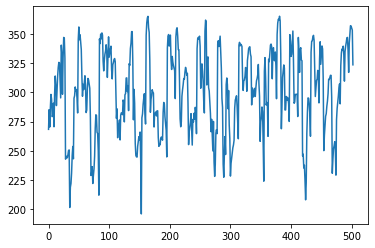

In [27]:
df1["Tamil Nadu"].plot()

In [28]:
adfuller(df1['Tamil Nadu'])

(-7.304887949347734,
 1.309361431886911e-10,
 0,
 502,
 {'1%': -3.4434437319767452,
  '5%': -2.8673146875484368,
  '10%': -2.569845688481135},
 4330.20791230041)

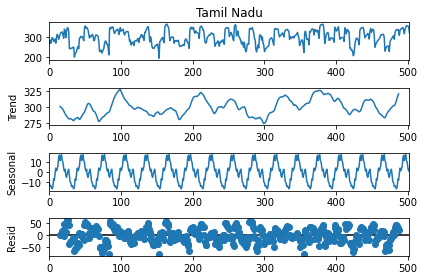

In [29]:
seasonal_decompose(df1["Tamil Nadu"],model="additive",period=30).plot()
plt.show()

In [30]:
df2

,States,latitude,longitude,Usage
Dates,,,,
2019-01-02,Punjab,31.519974,75.980003,119.9
2019-01-02,Haryana,28.450006,77.019991,130.3
2019-01-02,Rajasthan,26.449999,74.639981,234.1
2019-01-02,Delhi,28.669993,77.230004,85.8
2019-01-02,UP,27.599981,78.050006,313.9
...,...,...,...,...
2020-12-05,Manipur,24.799971,93.950017,2.5
2020-12-05,Meghalaya,25.570492,91.880014,5.8
2020-12-05,Mizoram,23.710399,92.720015,1.6


In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
import statsmodels.api as sm

In [33]:
import itertools
i=j=k=range(0,5)
ijk=itertools.product(i,j,k)
for parameter in ijk:
    mod=ARIMA(df1["Tamil Nadu"],order=parameter)
    result=mod.fit()
    print("Arima {} aic {}".format(parameter,result.aic))

Arima (0, 0, 0) aic 5020.216862479801
Arima (0, 0, 1) aic 4694.818186676985
Arima (0, 0, 2) aic 4586.946329493676
Arima (0, 0, 3) aic 4549.661919606888
Arima (0, 0, 4) aic 4522.704760367169
Arima (0, 1, 0) aic 4530.424461760158
Arima (0, 1, 1) aic 4530.473526760226
Arima (0, 1, 2) aic 4523.462249461069
Arima (0, 1, 3) aic 4523.932917888259
Arima (0, 1, 4) aic 4524.291069682526
Arima (0, 2, 0) aic 4894.745536753
Arima (0, 2, 1) aic 4530.6242673658835
Arima (0, 2, 2) aic 4530.824425738212
Arima (0, 2, 3) aic 4524.170635114809
Arima (0, 2, 4) aic 4524.829602278255


ValueError: d > 2 is not supported

In [34]:
exog=[ 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']

In [35]:
exogenous_features=["latitude","longitude","States"]

In [36]:
from pmdarima.arima import auto_arima

In [37]:
auto_arima(df2["Usage"],exogenous_features=exogenous_features)

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True)

In [38]:
import statsmodels.api as sm

In [41]:
import statsmodels.api as sm
best_model = sm.tsa.statespace.SARIMAX(df1['Tamil Nadu'],exog=df1[exog],order=(1,0,0),seasonal_order=(1,0,0,12))
best_results = best_model.fit()

In [44]:
df1.columns

Index(['Date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [47]:
df1["Forecast"]=best_results.predict()

Text(0.5, 1.0, 'Actual vs Forcasted')

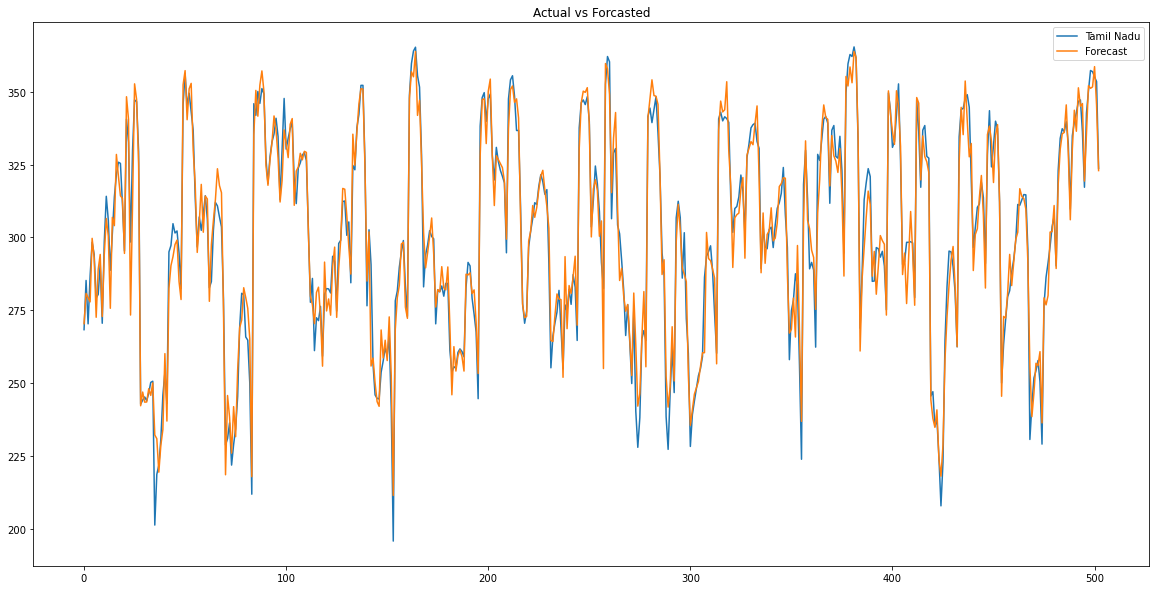

In [48]:
df1[["Tamil Nadu","Forecast"]].plot(figsize=(20,10))
plt.title("Actual vs Forcasted")